## Pré-processamento
- Dataset usado: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification
- 0 é fake e 1 é real

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.utils import resample

In [ ]:
# Lê o Dataset
df = pd.read_csv('../data/WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
# Remove a primeira coluna do dataframe
df = df.drop(df.columns[0], axis=1)
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
# total de linhas do dataframe
df.shape[0]

72134

### Remoção de linhas nulas

In [ ]:
# O método "sum()" soma os valores booleanos em cada coluna, contando quantos valores nulos existem

df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [ ]:
# Remove linhas nulas
df = df.dropna()

df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [ ]:
# total de linhas do dataframe
df.shape[0]

71537

### Checa e remove linhas repetidas

In [ ]:
# Conta as linhas duplicadas
df.duplicated().sum()

np.int64(8416)

In [ ]:
# Remove as linhas duplicadas
df = df.drop_duplicates()

# Total de linhas atualizado
df.shape[0]

63121

### Checa o equilibrio do dataset

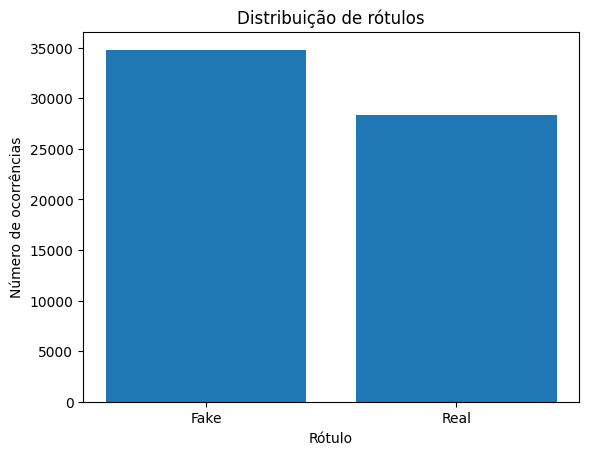

In [ ]:
# Cria e Exibe o gráfico

label_count = df.label.value_counts()

plt.bar(label_count.index, label_count)

plt.title("Distribuição de rótulos")

plt.xlabel("Rótulo")

plt.ylabel("Número de ocorrências")

plt.xticks([0, 1], ["Fake", "Real"])

plt.show()

### Faz o balanceamento dos dados com Undersampling
- O undersampling reduz o número de amostras da classe majoritária (neste caso, Fake News) para que fique proporcional à classe minoritária (Real News).

In [ ]:
# Separar as classes majoritárias (Fake News) e minoritárias (Real News)
df_fake = df[df["label"] == 0]
df_real = df[df["label"] == 1]

# Fazer o undersampling da classe majoritária (Fake News)
df_fake_downsampled = resample(
    df_fake,
    replace=False, 
    n_samples=len(df_real), 
    random_state=42,
) 

df_balanced = pd.concat([df_fake_downsampled, df_real])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Exibir a contagem de cada classe para verificar o balanceamento
print(df_balanced["label"].value_counts())

label
1    28330
0    28330
Name: count, dtype: int64


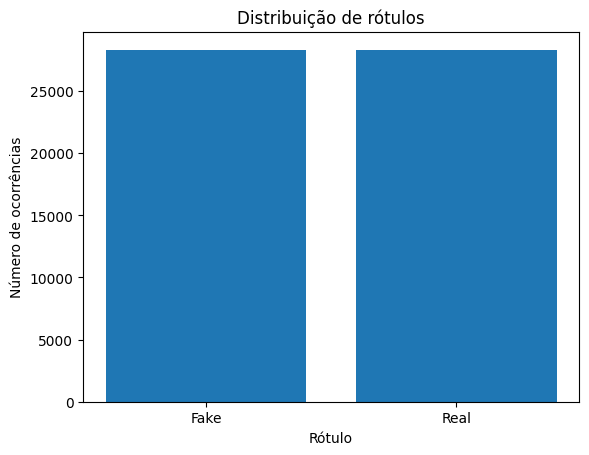

In [ ]:
# Cria e Exibe o gráfico

label_count = df_balanced.label.value_counts()

plt.bar(label_count.index, label_count)

plt.title("Distribuição de rótulos")

plt.xlabel("Rótulo")

plt.ylabel("Número de ocorrências")

plt.xticks([0, 1], ["Fake", "Real"])

plt.show()

In [ ]:
# Total de linhas atualizado
df_balanced.shape[0]

56660

### Data text Cleaning
- Remove URLs
- Remove menção de usuarios
- Remove numeros
- Remove pontuações e espaços

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  # vetoriza usando TF-IDF

# juntamos título e texto na mesma coluna
df_balanced['news'] = pd.concat([df_balanced['title'], df_balanced['text']], axis=1).apply(lambda x: ' '.join(x), axis=1)

df_balanced.head()

,title,text,label,news
0,FAKE NEWS! MAXINE WATERS and JOY REID Make Out...,,1,FAKE NEWS! MAXINE WATERS and JOY REID Make Out...
1,BREAKING: MORE HACKED E-MAILS From DNC Release...,it s not the first time that the name of vladi...,1,BREAKING: MORE HACKED E-MAILS From DNC Release...
2,"Mexico says top U.S., Mexican officials to mee...",mexico city reuters senior mexican officia...,0,"Mexico says top U.S., Mexican officials to mee..."
3,Trump Thinks Rush Limbaugh Is Real News And T...,rush limbaugh praised donald trump s insanely ...,1,Trump Thinks Rush Limbaugh Is Real News And T...
4,Mayweather ’Out of Retirement for McGregor’: M...,los angeles afp — retired unbeaten boxing...,0,Mayweather ’Out of Retirement for McGregor’: M...


In [ ]:
import string
import re

df_balanced["news"] = df_balanced["news"].apply(lambda x: re.sub(r"http\S+", "", x))
df_balanced["news"] = df_balanced["news"].apply(lambda x: re.sub(r"@\S+ ", "", x))
df_balanced["news"] = df_balanced["news"].apply(
    lambda x: "".join(i for i in x if not i.isdigit())
)
table = str.maketrans(string.punctuation, " " * len(string.punctuation))
df_balanced["news"] = df_balanced["news"].str.translate(table)
df_balanced["news"] = df_balanced["news"].str.replace(" +", " ")
df_balanced["news"] = df_balanced["news"].str.lower()
df_balanced["news"] = df_balanced["news"].str.strip()

In [ ]:
df_short = df_balanced.drop(['title', 'text'], axis=1)
df_short

,label,news
0,1,fake news maxine waters and joy reid make out...
1,1,breaking more hacked e mails from dnc release...
2,0,mexico says top u s mexican officials to mee...
3,1,trump thinks rush limbaugh is real news and th...
4,0,mayweather ’out of retirement for mcgregor’ m...
...,...,...
56655,1,board certified psychiatrist brutally diagnose...
56656,1,respect hollywood actor volunteers to fight i...
56657,0,u s senators denounce trump plan to focus cou...
56658,0,unskewing facebook will take all kinds column...


### Remoção de Stopwords

- As stop words são excluídas porque são muito comuns e não acrescentam muito valor à classificação

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# total de palavras antes das stopwords
df_short["news"].str.split().apply(len)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/weliton/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0         24
1        516
2        165
3        538
4        254
        ... 
56655    496
56656    942
56657    511
56658    759
56659    364
Name: news, Length: 56660, dtype: int64

In [ ]:
# Remove stopwords

stop_words = set(stopwords.words("english"))
df_short["news"] = df_short["news"].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop_words])
)

df_short["news"]

0        fake news maxine waters joy reid make outrageo...
1        breaking hacked e mails dnc released vengeful ...
2        mexico says top u mexican officials meet washi...
3        trump thinks rush limbaugh real news internet ...
4        mayweather ’out retirement mcgregor’ mma breit...
                               ...                        
56655    board certified psychiatrist brutally diagnose...
56656    respect hollywood actor volunteers fight isis ...
56657    u senators denounce trump plan focus counter e...
56658    unskewing facebook take kinds column shortages...
56659    james comey something trump sh tting pants tru...
Name: news, Length: 56660, dtype: object

In [ ]:
# total de palavras depois das stopwords
df_short["news"].str.split().apply(len)

0         20
1        291
2        119
3        280
4        151
        ... 
56655    268
56656    455
56657    339
56658    452
56659    185
Name: news, Length: 56660, dtype: int64

### Lemmatization
- Reduz as palavras em cada notícia para sua forma canônica

In [ ]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df_short["news"] = df_short["news"].apply(
    lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()])
)

[nltk_data] Downloading package wordnet to /home/weliton/nltk_data...


## Separa o conjunto de dados em conjuntos de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_short["news"], df_short["label"], test_size=0.2
)

In [ ]:
df_short_train = pd.concat([X_train, y_train], axis=1)
df_short_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
# total de linhas do dataframe de treino
df_short_train.shape[0]

45328

In [ ]:
# total de linhas do dataframe de teste
df_short_test.shape[0]

11332

In [ ]:
df_short_train.to_csv("../data/short_text_preprocessed_train.csv", index=False)
df_short_test.to_csv("../data/short_text_preprocessed_test.csv", index=False)